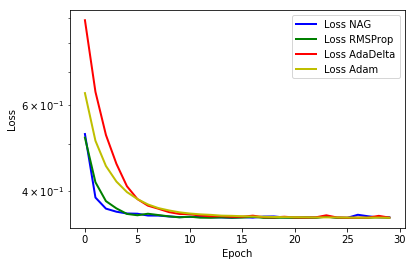

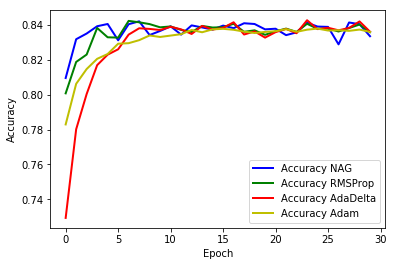

In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np       
import matplotlib.pyplot as plt

def NAG(X,y,X_test,y_test,eta,gama,C):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    b = np.random.randn(1)
    v_1 = np.zeros((123,1))
    v_2 = np.zeros(1)
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
            
            # hinge loss of trianing set
            hinge_loss_t = 1-y_train*(X_train.dot(w)+b)
            hinge_loss_t = np.maximum(0,np.sum(hinge_loss_t,axis=1))
            # Compute Gradient
            y_i = y_train.copy()
            y_i[hinge_loss_t==0]=0
            g_w = np.sum(y_i*X_train,axis=0).reshape(123,1)
            D_w = ((w-gama*v_1) - C * g_w)/len(X_train)
            D_b = (C * y_i.sum())/len(X_train)
            g_1 = D_w
            v_1 = gama*v_1 + eta*g_1
            w -= v_1
            g_2 = D_b
            v_2 = gama*v_2 + eta*g_2
            b -= v_2
        
        # hinge loss of testing set
        hinge_loss = 1-y_test*(X_test.dot(w)+b)
        hinge_loss = np.maximum(0,np.sum(hinge_loss,axis=1))
        t_loss = 0.5 * np.square(w).sum() + C * hinge_loss.sum()
        test_loss.append(t_loss/len(X_test))

        h = np.dot(X_test,w)+b
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

def RMSProp(X,y,X_test,y_test,eta,gama,epsilon,C):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    b = np.random.randn(1)
    G_1 = np.zeros((123,1))
    G_2 = np.zeros(1)
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
            # hinge loss of trianing set
            hinge_loss_t = 1-y_train*(X_train.dot(w)+b)
            hinge_loss_t = np.maximum(0,np.sum(hinge_loss_t,axis=1))
            
            # Compute Gradient
            y_i = y_train.copy()
            y_i[hinge_loss_t==0]=0
            g_w = np.sum(y_i*X_train,axis=0).reshape(123,1)
            D_w = (w - C * g_w)/len(X_train)
            D_b = (C * y_i.sum())/len(X_train)
            g_1 = D_w
            G_1 = gama*G_1 + (1-gama)*np.square(g_1)
            w -= (eta/(np.sqrt(G_1+epsilon)))*g_1
            g_2 = D_b
            G_2 = gama*G_2 + (1-gama)*np.square(g_2)
            b -= (eta/(np.sqrt(G_2+epsilon)))*g_2
        
        # hinge loss of testing set
        hinge_loss = 1-y_test*(X_test.dot(w)+b)
        hinge_loss = np.maximum(0,np.sum(hinge_loss,axis=1))
        t_loss = 0.5 * np.square(w).sum() + C * hinge_loss.sum()
        test_loss.append(t_loss/len(X_test))

        h = np.dot(X_test,w)+b
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

def AdaDelta(X,y,X_test,y_test,gama,epsilon,C):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    b = np.random.randn(1)
    G_1 = np.zeros((123,1))
    G_2 = np.zeros(1)
    delta_t1 = np.zeros((123,1))
    delta_t2 = np.zeros(1)
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
            
            # hinge loss of trianing set
            hinge_loss_t = 1-y_train*(X_train.dot(w)+b)
            hinge_loss_t = np.maximum(0,np.sum(hinge_loss_t,axis=1))


            # Compute Gradient
            y_i = y_train.copy()
            y_i[hinge_loss_t==0]=0
            g_w = np.sum(y_i*X_train,axis=0).reshape(123,1)
            D_w = (w - C * g_w)/len(X_train)
            D_b = (C * y_i.sum())/len(X_train)
            g_1 = D_w
            G_1 = gama*G_1 + (1-gama)*np.square(g_1)
            delta_w1 = -(np.sqrt(delta_t1+epsilon)/np.sqrt(G_1+epsilon))*g_1
            w += delta_w1
            delta_t1 = gama*delta_t1 + (1-gama)*np.square(delta_w1)
            g_2 = D_b
            G_2 = gama*G_2 + (1-gama)*np.square(g_2)
            delta_w2 = -(np.sqrt(delta_t2+epsilon)/np.sqrt(G_2+epsilon))*g_2
            b += delta_w2
            delta_t2 = gama*delta_t2 + (1-gama)*np.square(delta_w2)
        
        # hinge loss of testing set
        hinge_loss = 1-y_test*(X_test.dot(w)+b)
        hinge_loss = np.maximum(0,np.sum(hinge_loss,axis=1))
        t_loss = 0.5 * np.square(w).sum() + C * hinge_loss.sum()
        test_loss.append(t_loss/len(X_test))
        
        h = np.dot(X_test,w)+b
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

def Adam(X,y,X_test,y_test,eta,gama,epsilon,beta_1,C):
    np.random.seed(42)
    test_loss = []
    test_acc = []
    w = np.random.randn(123,1)
    b = np.random.randn(1)
    G_1 = np.zeros((123,1))
    m_1 = np.zeros((123,1))
    G_2 = np.zeros(1)
    m_2 = np.zeros(1)
    length = len(X)
    minibatch_size = 500
    for epoch in range(30):
        shuffled_indices = np.random.permutation(length)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0,length,minibatch_size):
            X_train = X_shuffled[i:i+minibatch_size]
            y_train = y_shuffled[i:i+minibatch_size]
            # hinge loss of trianing set
            hinge_loss_t = 1-y_train*(X_train.dot(w)+b)
            hinge_loss_t = np.maximum(0,np.sum(hinge_loss_t,axis=1))

            # Compute Gradient
            y_i = y_train.copy()
            y_i[hinge_loss_t==0]=0
            g_w = np.sum(y_i*X_train,axis=0).reshape(123,1)
            D_w = (w - C * g_w)/len(X_train)
            D_b = (C * y_i.sum())/len(X_train)
            g_1 = D_w
            m_1 = beta_1*m_1 + (1-beta_1)*g_1
            G_1 = gama*G_1 + (1-gama)*np.square(g_1)
            alpha_1 = eta*np.sqrt(1-gama**(epoch+1))/(1-beta_1**(epoch+1))
            w -= alpha_1*m_1/(np.sqrt(G_1+epsilon))
            g_2 = D_b
            m_2 = beta_1*m_2 + (1-beta_1)*g_2
            G_2 = gama*G_2 + (1-gama)*np.square(g_2)
            alpha_2 = eta*np.sqrt(1-gama**(epoch+1))/(1-beta_1**(epoch+1))
            b -= alpha_2*m_2/(np.sqrt(G_2+epsilon))
        
        # hinge loss of testing set
        hinge_loss = 1-y_test*(X_test.dot(w)+b)
        hinge_loss = np.maximum(0,np.sum(hinge_loss,axis=1))
        t_loss = 0.5 * np.square(w).sum() + C * hinge_loss.sum()
        test_loss.append(t_loss/len(X_test))
        
        h = np.dot(X_test,w)+b
        y_pred = h.copy()
        y_pred[h>=0.5]=1
        y_pred[h<0.5]=-1
        count=0
        for k in range(len(X_test)):
            if y_pred[k]*y_test[k][0]>0:
                count+=1
        test_acc.append(count/len(X_test))
    return test_loss,test_acc

if __name__ == '__main__':
    X_train,y_train = load_svmlight_file("a9a")
    X_test,y_test = load_svmlight_file("a9a.t")
    X_train = np.array(X_train.toarray())
    X_test = np.array(X_test.toarray())
    X_test = np.insert(X_test,122,values=np.zeros(len(X_test)),axis=1)
    y_train = np.array(y_train).reshape(len(X_train),1)
    y_test = np.array(y_test).reshape(len(X_test),1)
    Loss_NAG,Acc_NAG = NAG(X_train,y_train,X_test,y_test,eta=0.06,gama=0.9,C=1)
    Loss_RMS,Acc_RMS = RMSProp(X_train,y_train,X_test,y_test,eta=0.001,gama=0.9999,epsilon=1e-8,C=1)
    Loss_Ada,Acc_Ada = AdaDelta(X_train,y_train,X_test,y_test,gama=0.99,epsilon=1e-6,C=1)
    Loss_Adam,Acc_Adam = Adam(X_train,y_train,X_test,y_test,eta=0.01,gama=0.999,epsilon=1e-6,beta_1=0.9,C=1)
    plt.figure(1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(Loss_NAG,'b',linewidth='2',label='Loss NAG')
    plt.plot(Loss_RMS,'g',linewidth='2',label='Loss RMSProp')
    plt.plot(Loss_Ada,'r',linewidth='2',label='Loss AdaDelta')
    plt.plot(Loss_Adam,'y',linewidth='2',label='Loss Adam')
    plt.yscale('log')
    plt.legend()
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(Acc_NAG,'b',linewidth='2',label='Accuracy NAG')
    plt.plot(Acc_RMS,'g',linewidth='2',label='Accuracy RMSProp')
    plt.plot(Acc_Ada,'r',linewidth='2',label='Accuracy AdaDelta')
    plt.plot(Acc_Adam,'y',linewidth='2',label='Accuracy Adam')
    plt.legend()
    plt.show()